In [1]:
#Import stuffs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Add CSV
df = pd.read_csv('Pokemon.csv')




In [3]:
#Count the null values

nan_count = df.isna().sum()
print(nan_count )

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [4]:
#Identify pokemone with names longer than 12 characters and drop them 

df = df.loc[df['Name'].str.len() <= 12]

In [5]:
#Just rename Type 1 to Type since we will drop Type 2

df = df.rename(columns={"Type 1": "Type"})
df

,#,Name,Type,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True


In [6]:
# Switch all string values to int for type

type = {'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Electric': 4, 'Ice': 5, 'Fighting': 6, 'Poison': 7, 'Ground': 8, 'Flying': 9, 'Psychic': 10, 'Bug': 11, 'Rock': 12, 'Ghost': 13, 'Dark': 14, 'Dragon': 15, 'Steel': 16, 'Fairy': 18, }

df.Type = [type[item] for item in df.Type]



In [7]:
# Just taking a peek at the individual Pokemon

print(df.loc[df['Name'] == 'Terrakion'])

       #       Name  Type    Type 2  Total  HP  Attack  Defense  Sp. Atk  \
700  639  Terrakion    12  Fighting    580  91     129       90       72   

     Sp. Def  Speed  Generation  Legendary  
700       90    108           5       True  


In [8]:
print(df.loc[df['HP'] == 65])
print(df.loc[df['Name'] == 'Garchomp'])

       #        Name  Type    Type 2  Total  HP  Attack  Defense  Sp. Atk  \
18    15    Beedrill    11    Poison    395  65      90       40       45   
27    22      Fearow     0    Flying    442  65      90       65       61   
58    53     Persian     0       NaN    440  65      70       60       65   
62    57    Primeape     6       NaN    455  65     105       60       60   
66    61   Poliwhirl     2       NaN    385  65      65       65       50   
76    70  Weepinbell     3    Poison    390  65      90       50       85   
84    78    Rapidash     1       NaN    500  65     100       70       80   
93    86        Seel     2       NaN    325  65      45       55       45   
118  110     Weezing     7       NaN    490  65      90      120       85   
122  114     Tangela     3       NaN    435  65      55      115      100   
133  124        Jynx     5   Psychic    455  65      50       35      115   
134  125  Electabuzz     4       NaN    490  65      83       57       95   

<AxesSubplot:xlabel='Defense', ylabel='Attack'>

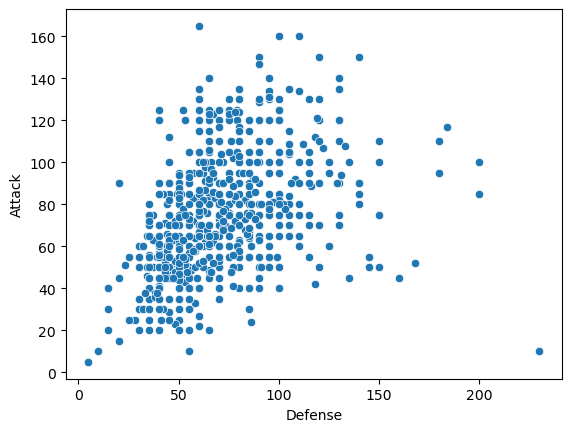

In [9]:
#df.drop(columns = ['Type 2','Name'], axis=1, inplace=True)

# Gives me the correlation between Type and other values

sns.scatterplot(data=df, x="Defense", y="Attack", palette= "deep")


In [10]:
# Add a column of just water type Pokemon
waterType = []

for i in range(len(df.index)):
    type = df.iat[i,2]
    if type == 2:
        waterType.append('Yes')
    else:
        waterType.append('No')
    

df['waterType'] = waterType




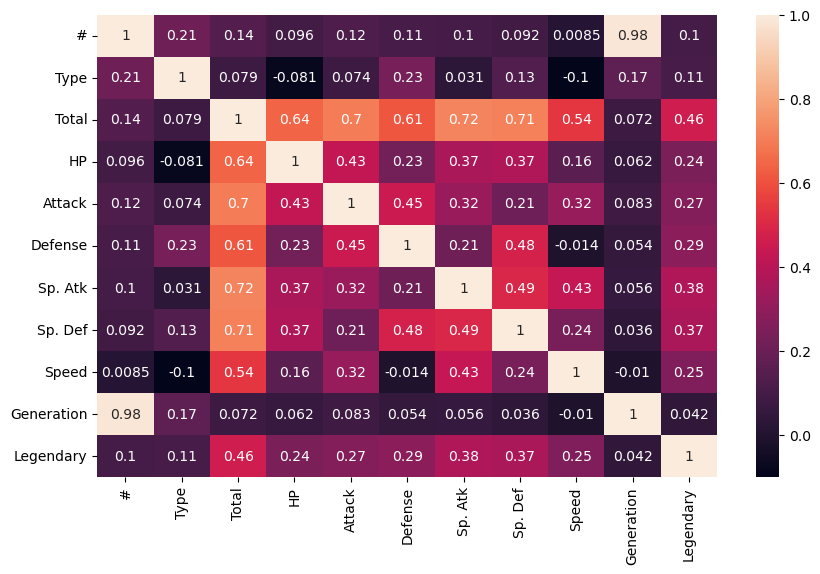

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()



<AxesSubplot:xlabel='Sp. Atk', ylabel='Sp. Def'>

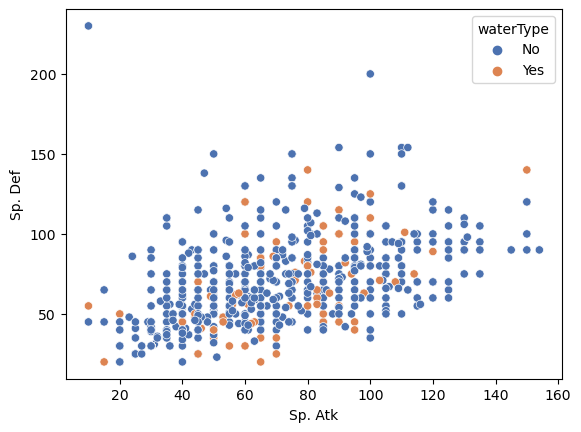

In [12]:
# Plot the correlations between water type and values

sns.scatterplot(data=df, x="Sp. Atk", y="Sp. Def", hue="waterType", palette= "deep")


<AxesSubplot:xlabel='Type', ylabel='Sp. Def'>

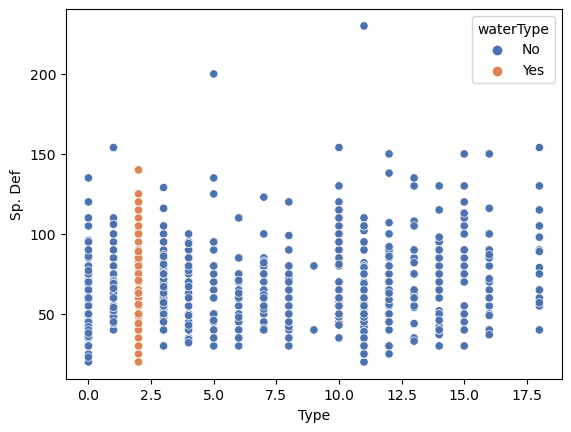

In [13]:
# Gives me the correlation between Type and other values

sns.scatterplot(data=df, x="Type", y="Sp. Def", hue="waterType", palette= "deep")

In [14]:

# Drop 'Type 2' and 'Name'

df.drop(columns = ['#','Type 2','Name','Legendary','Generation','waterType'], axis=1, inplace=True)


In [15]:

df

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,3,318,45,49,49,65,65,45
1,3,405,60,62,63,80,80,60
2,3,525,80,82,83,100,100,80
4,1,309,39,52,43,60,50,65
5,1,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...
791,9,535,85,70,80,97,80,123
792,18,680,126,131,95,131,98,99
793,14,680,126,131,95,131,98,99
795,12,600,50,100,150,100,150,50


In [16]:

#watertype = {'Yes': 1, 'No': 2}

#df.waterType = [watertype[item] for item in df.waterType]

In [17]:

#Main split

###############

from sklearn.model_selection import train_test_split

x = df.drop("Type",axis=1)
y = df[["Type"]]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

x_test = x_test.reset_index()
x_train = x_train.reset_index()
###############


#2nd split


,index,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,116,385,90,55,75,60,75,30
1,22,479,83,80,75,70,70,101
2,690,370,70,55,75,45,65,60
3,727,237,38,36,38,32,36,57
4,374,468,63,120,85,90,55,55
...,...,...,...,...,...,...,...,...
559,157,580,90,90,85,125,90,100
560,724,314,41,56,40,62,44,71
561,79,515,80,70,65,80,120,100
562,255,210,35,35,35,35,35,35


In [18]:
# sns.scatterplot(data=df, x="Attack", y="Type", hue="waterTypes")

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(x_train,y_train)

print(knn.score(x_test,y_test))

0.21830985915492956


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

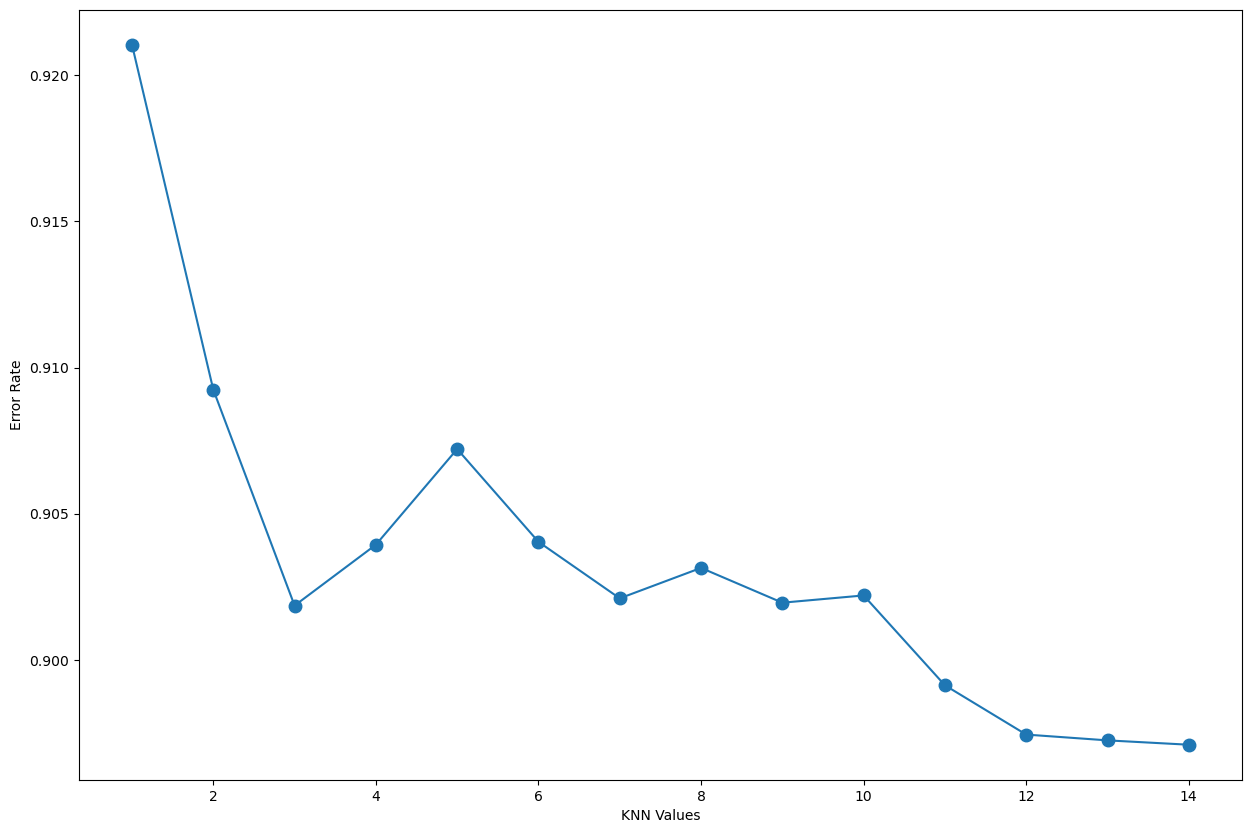

In [24]:
error_rate = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.xlabel("KNN Values")
plt.ylabel("Error Rate")
plt.plot(range(1,15),error_rate, marker='o', markersize=9)

In [25]:
predicted = knn.predict(x_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
y_test = np.array(y_test)
for x in range(len(predicted)):
    print("Predicted ", predicted[x],"Actual: ", y_test[x])


Predicted  6 Actual:  [15]
Predicted  11 Actual:  [0]
Predicted  0 Actual:  [0]
Predicted  2 Actual:  [3]
Predicted  0 Actual:  [3]
Predicted  12 Actual:  [16]
Predicted  4 Actual:  [1]
Predicted  11 Actual:  [12]
Predicted  2 Actual:  [5]
Predicted  2 Actual:  [0]
Predicted  13 Actual:  [4]
Predicted  0 Actual:  [7]
Predicted  12 Actual:  [2]
Predicted  14 Actual:  [7]
Predicted  13 Actual:  [8]
Predicted  8 Actual:  [6]
Predicted  18 Actual:  [15]
Predicted  12 Actual:  [8]
Predicted  3 Actual:  [4]
Predicted  1 Actual:  [1]
Predicted  8 Actual:  [0]
Predicted  4 Actual:  [1]
Predicted  3 Actual:  [2]
Predicted  12 Actual:  [12]
Predicted  12 Actual:  [1]
Predicted  2 Actual:  [0]
Predicted  1 Actual:  [3]
Predicted  15 Actual:  [13]
Predicted  4 Actual:  [4]
Predicted  0 Actual:  [11]
Predicted  11 Actual:  [2]
Predicted  4 Actual:  [2]
Predicted  3 Actual:  [5]
Predicted  0 Actual:  [10]
Predicted  14 Actual:  [6]
Predicted  15 Actual:  [4]
Predicted  15 Actual:  [15]
Predicted  18

In [43]:

#Gives me the predicted values that were right.
x_test.reset_index()
for x in range(len(predicted)):
    HP = x_test.iat[x,1]
    Attack = x_test.iat[x,2]
    Def = x_test.iat[x,3]
    if predicted[x] == y_test[x]:
        print("Predicted ", predicted[x],"Actual: ", y_test[x], "HP: " + str(HP), " Attack: " + str(Attack) + " Def: " + str(Def))

Predicted  0 Actual:  [0] HP: 73  Attack: 115 Def: 60
Predicted  1 Actual:  [1] HP: 75  Attack: 95 Def: 67
Predicted  12 Actual:  [12] HP: 30  Attack: 42 Def: 118
Predicted  4 Actual:  [4] HP: 90  Attack: 85 Def: 75
Predicted  15 Actual:  [15] HP: 100  Attack: 150 Def: 120
Predicted  0 Actual:  [0] HP: 90  Attack: 30 Def: 15
Predicted  8 Actual:  [8] HP: 105  Attack: 130 Def: 120
Predicted  11 Actual:  [11] HP: 60  Attack: 50 Def: 70
Predicted  18 Actual:  [18] HP: 50  Attack: 25 Def: 28
Predicted  2 Actual:  [2] HP: 100  Attack: 100 Def: 100
Predicted  1 Actual:  [1] HP: 55  Attack: 70 Def: 45
Predicted  18 Actual:  [18] HP: 95  Attack: 70 Def: 73
Predicted  16 Actual:  [16] HP: 75  Attack: 85 Def: 200
Predicted  0 Actual:  [0] HP: 63  Attack: 60 Def: 55
Predicted  2 Actual:  [2] HP: 65  Attack: 45 Def: 55
Predicted  6 Actual:  [6] HP: 120  Attack: 100 Def: 85
Predicted  0 Actual:  [0] HP: 55  Attack: 70 Def: 55
Predicted  4 Actual:  [4] HP: 65  Attack: 65 Def: 60
Predicted  15 Actual

In [28]:

print(df.loc[df['HP'] == 100])

     Type  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
165    10    600  100     100      100      100      100    100
178     0    442  100      50       50       76       96     70
199     2    420  100      50       80       60       80     50
221     0    415  100      70       70       65       65     45
239     5    450  100     100       80       60       60     50
264     2    580  100      75      115       90      115     85
267    12    600  100     134      110       95      100     61
271    10    600  100     100      100      100      100    100
282     2    535  100     110       90       85       90     60
346     7    467  100      73       83       73       83     55
404     2    485  100      90      130       45       65     55
421     2    670  100     100       90      150      140     90
423     8    670  100     150      140      100       90     90
427    16    600  100     100      100      100      100    100
478    14    505  100     125       52  

In [39]:
#Gives me the Pokemon that it predicted that were water type // Right or Wrong
for x in range(len(predicted)):
    HP = x_test.iat[x,1]
    Attack = x_test.iat[x,2]
    Def = x_test.iat[x,3]
    if y_test[x] == 2:       
        print("Predicted ", predicted[x],"Actual: ", y_test[x], "HP: " + str(HP), " Attack: " + str(Attack) + " Def: " + str(Def))

        

Predicted  12 Actual:  [2] HP: 54  Attack: 78 Def: 103
Predicted  3 Actual:  [2] HP: 75  Attack: 105 Def: 75
Predicted  11 Actual:  [2] HP: 79  Attack: 83 Def: 100
Predicted  4 Actual:  [2] HP: 40  Attack: 50 Def: 40
Predicted  1 Actual:  [2] HP: 90  Attack: 120 Def: 100
Predicted  11 Actual:  [2] HP: 45  Attack: 67 Def: 60
Predicted  0 Actual:  [2] HP: 65  Attack: 65 Def: 65
Predicted  4 Actual:  [2] HP: 60  Attack: 75 Def: 85
Predicted  2 Actual:  [2] HP: 100  Attack: 100 Def: 100
Predicted  12 Actual:  [2] HP: 100  Attack: 90 Def: 130
Predicted  4 Actual:  [2] HP: 70  Attack: 120 Def: 40
Predicted  4 Actual:  [2] HP: 75  Attack: 98 Def: 63
Predicted  5 Actual:  [2] HP: 90  Attack: 75 Def: 75
Predicted  2 Actual:  [2] HP: 65  Attack: 45 Def: 55
Predicted  11 Actual:  [2] HP: 90  Attack: 95 Def: 95
Predicted  11 Actual:  [2] HP: 85  Attack: 105 Def: 100
Predicted  3 Actual:  [2] HP: 95  Attack: 100 Def: 85
Predicted  0 Actual:  [2] HP: 80  Attack: 92 Def: 65
Predicted  4 Actual:  [2] 

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
672,410,66,117,70,40,50,67
475,480,65,76,84,54,96,105
367,458,73,115,60,60,60,90
510,494,90,92,75,92,85,60
203,340,55,45,50,45,65,80
...,...,...,...,...,...,...,...
129,340,30,45,55,70,55,85
90,352,52,65,55,58,62,60
682,485,77,120,90,60,90,48
341,405,60,40,50,75,85,95


In [35]:
print(df.loc[df['HP'] == 72])

#greninja is index 726
# IT predicted manaphy as a water type
# Also predicted seel as a watter type



     Type  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
320     6    237  72      60       30       20       30     25
622    10    490  72      58       80      103       80     97
695    14    420  72      85       70       65       70     58
726     2    530  72      95       67      103       71    122
759    12    500  72     105      115       54       86     68


In [ ]:
# Import SVM
# from sklearn.svm import SVC
# from sklearn import svm
# estimator = SVC(kernel='linear')

# # Let us conduct parameter tuning with GridSearchCV to optimize our results
# from sklearn.model_selection import GridSearchCV



In [ ]:

# Prep up parameters to tune
# svm_parameters = [
#                   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#                   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
#                   ]


In [ ]:

# Train our SVM classifier                  
# svm_classifier = GridSearchCV(estimator=estimator, param_grid=svm_parameters)
# svm_classifier.fit(x_train, y_train)


In [ ]:

# The best parameters with the score:
# print('Best score for data:', svm_classifier.best_score_)
# print('Best C:',svm_classifier.best_estimator_.C) 
# print('Best Kernel:',svm_classifier.best_estimator_.kernel)
# print('Best Gamma:',svm_classifier.best_estimator_.gamma)


In [ ]:

# Test our trained SVM classifier with our test data
# svm_classifier.score(X_test, Y_test)

# Accuracy is 23%